# **Machine Learning Exercise Solution: FAMU-FSU COE Visit**

## **Running the notebook:**

Problem Definition:
The datasets consists of the following 10 features:
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class                       (2 for benign, 4 for malignant)


The task here is to use the attributes to predict if a tumor is benign or malignant.  

You can find the dataset at the following link: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Like the tutorial, we will proceed with the following tasks:

Step 1: Data Preparation

Step 2: Data Exploration

Step 3: Prediction of tumors

Step 4: Metrics to Analyze the performance of your model



The libraries are already declared for your convenience but feel free to add any other libraries that you know could be helpful in your analysis. 

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

As we mentioned in the tutorial, the first step would focus on cleaning and preparing your data. Use the code in the following cell to clean and make ready your data. 

In [3]:
#cleaning data and split it into train and test
#names = ['codeNumber','clumpThickness','CellSize','Cellshape','MarginalAdhesion','EpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
data = pd.read_csv('data_numerical.csv',header=None)
#replacing missing values by zero but there are many different ways to handle them.
data = data.replace("?",0)
data = data.as_matrix()
ncolumns = len(data[1]) - 1

data[:,ncolumns] = pd.factorize(data[:,ncolumns])[0]
data[:,ncolumns] = data[:,ncolumns].astype(int)

Now that your data is ready you could proceed. In this step you would use methods and visualizations to know more about your data. You would not be able to do a comprehensive and good analysis without knowing your data. 

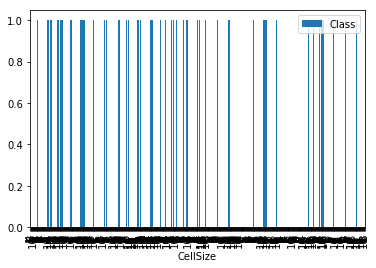

In [37]:
#data exploration and visualization to know your data better
import seaborn as sns
data_visual = pd.DataFrame(data)
data_visual.columns = ['codeNumber','clumpThickness','CellSize','Cellshape','MarginalAdhesion','EpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
#get the infromation about the dataframe such as frequency, unique values and standard deviation
data_visual.info()
data_visual.describe()
#visualization
data_visual.CellSize = pd.to_numeric(data_visual.CellSize, errors='ignore')
data_visual.Cellshape = pd.to_numeric(data_visual.Cellshape, errors='ignore')
data_visual.plot(kind='bar',x='CellSize',y='Class')

You acquired knowledge about your data which is a necessity in any data sciene project. Now, try to use your knowledge to define the classification model which helps you in predicting the tumors. 

In [14]:
#Split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(data,data[:,ncolumns].astype(int),test_size=0.3)

#k-Nearest Neighbors Algorithm

neighbors = KNeighborsClassifier(n_neighbors=17,metric='euclidean')

#Create the model with the training set
neighbors.fit(X_train,y_train)

#Predict the class of each instance in the test set
y_predicted = neighbors.predict(X_test)

Until now, you defined the classification model and made some prediction out of the test data. However, you do not know how well your model performs. Therefore, you need to spend some time to assess the model performance using the metrics including: accuracy, precision, recall and F1-score. 

In [15]:
#assess the model performance using the wellknown metrics 
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predicted))
print('Accuracy: ', accuracy_score(y_test,y_predicted)*100, '%')

[[124  15]
 [ 53  18]]
Accuracy:  67.61904761904762 %


Great Job! You finished the excercise successfully. Make sure to check the solution notebook if you have any confusion or problem. 